In [3]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/robinakashita/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/Users/robinakashita/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/Users/robinakashita/anaconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 711, in start
    self.io_loop.star

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/robinakashita/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/Users/robinakashita/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/Users/robinakashita/anaconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 711, in start
    self.io_loop.star

AttributeError: _ARRAY_API not found

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [2]:
filepath = ("/volumes/TOSHIBA/MIT/b.e13.Bi1850C5.f19_g16.itrace.ice_ghg_orb_wtr.cam.h0.PRECT.nc")

In [3]:
test = xr.open_dataset(filepath).sel(lon= (46.88), lat=(-15.53), method = "nearest")
test = test*86400000
test

<xarray.Dataset>
Dimensions:  (time: 95988)
Coordinates:
    lat      float64 -16.11
    lon      float64 47.5
  * time     (time) object 1001-02-01 00:00:00 ... 8999-12-11 00:00:00
Data variables:
    precip   (time) float64 13.65 9.957 9.564 1.928 ... 0.09093 3.477 9.78

In [4]:
df2 = pd.read_csv('/volumes/TOSHIBA/MIT/ab12_corrected.csv')

In [5]:
def seasonal_means(test):
    month_length = test.time.dt.days_in_month
    seasonal_sst = ((test*month_length).resample(time = 'QS-DEC').sum() / 
                month_length.resample(time ='QS-DEC').sum())
    mam = seasonal_sst.sel(time = seasonal_sst.time.dt.season=='MAM')
    jja = seasonal_sst.sel(time = seasonal_sst.time.dt.season=='JJA')
    son = seasonal_sst.sel(time = seasonal_sst.time.dt.season=='SON')
    djf = seasonal_sst.sel(time = seasonal_sst.time.dt.season=='DJF')
    
    annual = test.groupby('time.year').mean(dim='time')
    
    return mam, jja, son, djf, annual

In [6]:
mam, jja, son, djf, annual = seasonal_means(test)

In [7]:
djf['time'] = np.arange(19,11,-0.001)
djf['time'] = djf['time']*1000

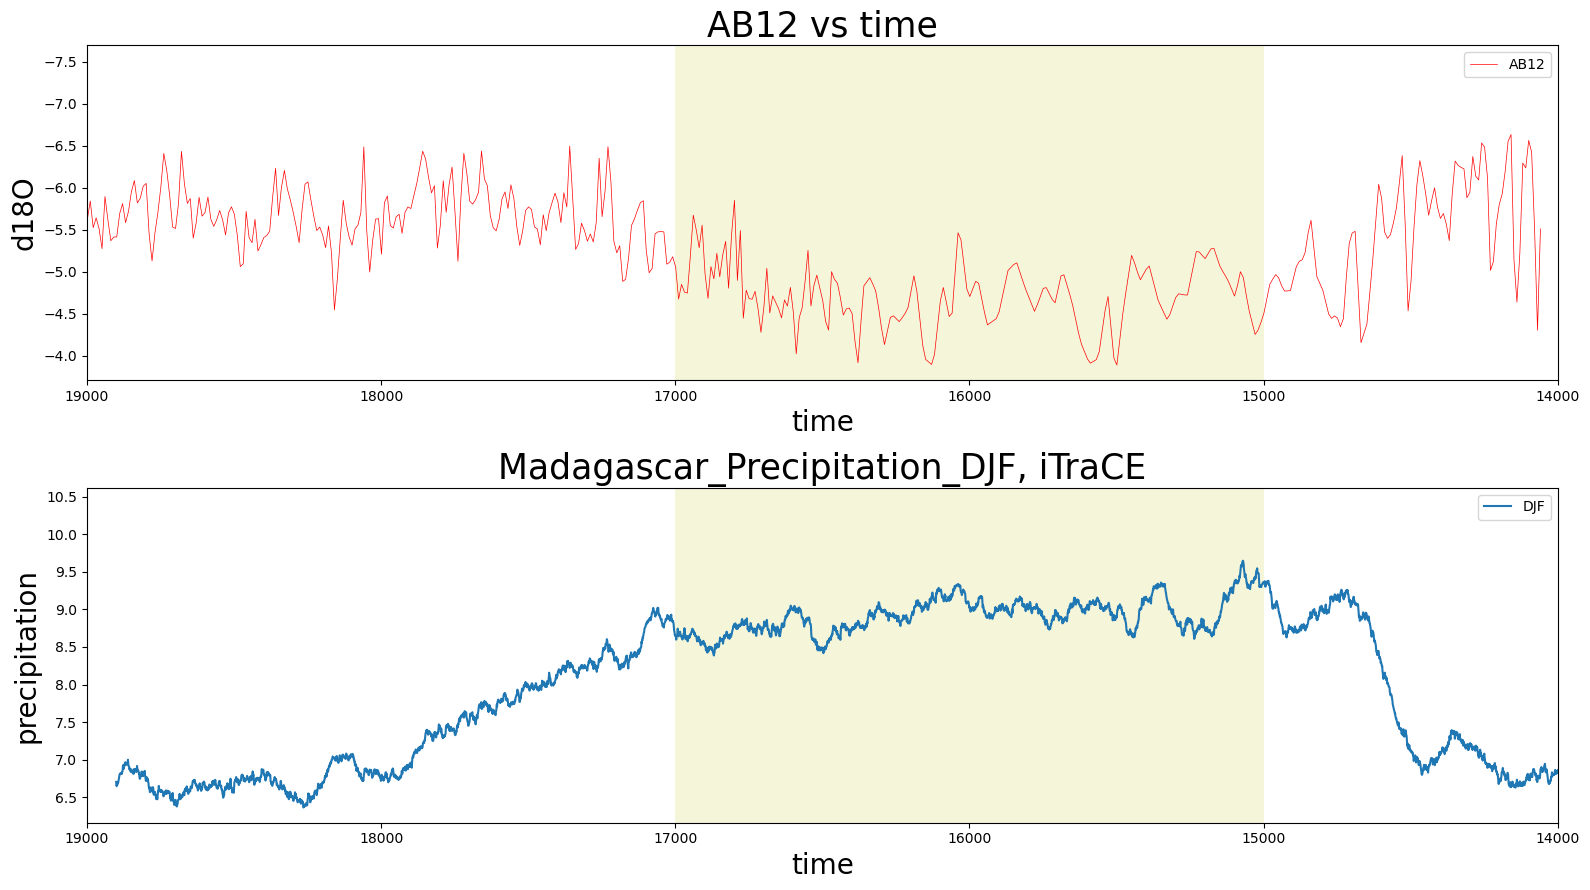

In [15]:
fig, ax = plt.subplots(2, 1, figsize=(16,9))

plt.subplot(212)

#mam.precip.rolling(time = 10).mean().plot()
#jja.precip.plot()
#son.precip.plot()
djf.precip.rolling(time = 100).mean().plot()

plt.xlim(14000,19000)
#plt.ylim(-8, -2.5)

plt.gca().invert_xaxis()

plt.legend(
    [
        "DJF"
    ]
)
plt.axvspan(15000, 17000, facecolor='y', alpha=0.15, label = "HS-1")
plt.xlabel('time', fontsize = 20)
plt.ylabel('precipitation', fontsize = 20)
plt.title("Madagascar_Precipitation_DJF, iTraCE", fontsize = 25)

plt.subplot (211)

plt.plot(df2['age']*1000,df2['corrected d18O'], color = 'red', label = "AB12",linewidth = 0.5)

plt.xlim(14000,19000)
#plt.ylim(-8, -2.5)

plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

plt.legend(["AB12", "])

plt.axvspan(15000, 17000, facecolor='y', alpha=0.15, label = "HS-1")

plt.xlabel('time', fontsize = 20)
plt.ylabel('d18O', fontsize = 20)
plt.title("AB12 vs time", fontsize = 25)

plt.tight_layout()